In [155]:
#Import chunk


import numpy as np

import math

import struct

import random

import time

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt










In [156]:
def tanh(x):
    return np.tanh(x)

def softmax(x):
    #这里减去x.max()为了防止指数爆炸，并不会影响结果
    exp=np.exp(x-x.max())
    return exp/exp.sum()

In [157]:
#Initial chunk

#两层的维度
dimension=[784,10]
#两层的激活函数
activation=[tanh,softmax]

distribution=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimension[0]+dimension[1])),math.sqrt(6/(dimension[0]+dimension[1]))]}
]





In [158]:
#Parameter's initial


def init_b(layer):
    dist=distribution[layer]['b']
    return np.random.rand(dimension[layer])*(dist[1]-dist[0])+dist[0]


def init_w(layer):
    dist=distribution[layer]['w']
    return np.random.rand(dimension[layer-1],dimension[layer])*(dist[1]-dist[0])+dist[0]

def init_wb():
    parameter=[]
    for i in range(len(distribution)):
        layer_parameter={}
        for j in distribution[i].keys():
            if j=='w':
                layer_parameter['w']=init_w(i)
            elif j=='b':
                layer_parameter['b']=init_b(i)
        parameter.append(layer_parameter)
    return parameter

In [159]:
parameters=init_wb()

In [160]:
def predict(image,parameters):
    hidden=activation[0](image+parameters[0]['b'])
    output=activation[1](np.dot(hidden,parameters[1]['w'])+parameters[1]['b'])
    return output

In [161]:
data_path='./datas/'

train_image_path=data_path+'train-images.idx3-ubyte'
train_label_path=data_path+'train-labels.idx1-ubyte'

test_image_path=data_path+'t10k-images.idx3-ubyte'
test_label_path=data_path+'t10k-labels.idx1-ubyte'


In [162]:
train_num=50000
validate_num=10000
test_num=10000

with open(train_image_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    tem_image=np.fromfile(f,dtype=np.uint8).reshape(-1,784)
    train_image=tem_image[:train_num]
    validate_image=tem_image[train_num:]
    
with open(test_image_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_image=np.fromfile(f,dtype=np.uint8).reshape(-1,784)
    

with open(train_label_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    tem_label=np.fromfile(f,dtype=np.uint8)
    train_label=tem_label[:train_num]
    validate_label=tem_label[train_num:]

with open(test_label_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_label=np.fromfile(f,dtype=np.uint8)    
    

In [163]:
def show_train(index):
    print('label:'+str(train_label[index]))
    a_image=train_image[index].reshape(-1,28)
    plt.imshow(a_image,cmap='gray')
    
    
def show_validate(index):
    print('label:'+str(validate_label[index]))
    a_image=validate_image[index].reshape(-1,28)
    plt.imshow(a_image,cmap='gray')
    
    
def show_test(index):
    print('label:'+str(test_label[index]))
    a_image=test_image[index].reshape(-1,28)
    plt.imshow(a_image,cmap='gray')



In [164]:
label_keys=np.identity(dimension[-1])


In [165]:
def loss(image,label,parameters):
    y_predict=predict(image,parameters)
    y_label=label_keys[label]
    difference=y_predict-y_label
    return np.dot(difference,difference)

In [166]:
#loss(train_image[0],train_label[0],parameters)

In [167]:
def validate_verify(parameters):
    error_num=0
    for i in range(validate_num):
        
        if predict(validate_image[i],parameters).argmax()!=validate_label[i]:
        
            error_num+=1
            
    rate=1-error_num/validate_num
    print('准确率：'+str(rate*100)+'%')
    

In [168]:
#validate_verify(parameters)

In [169]:
def init_zero_grad():
    parameter=[]
    for layer in range(len(distribution)):
        layer_parameter={}
        for j in distribution[layer].keys():
            if j=='w':
                layer_parameter['w']=np.zeros((dimension[layer-1],dimension[layer]))
            elif j=='b':
                layer_parameter['b']=np.zeros(dimension[layer])
        parameter.append(layer_parameter)
    return parameter

In [170]:
'''
def calculate_a_grad(image,label):
    
    l0=image+parameters[0]['b']
    
    h=activation[0](l0)
    
    l2=np.dot(h,parameters[1]['w'])+parameters[1]['b']
    
    l3=activation[1](l2)
    
  
    exp_l2=np.exp(l2-l2.max())
    
    zero_grad=init_zero_grad()
    
    
    #calculate grad b0    
    for i in range(784):
        #对于b0的每一个分量b0[i]
        for j in range(10):
            tem=2*(l3[j]-label_keys[label][j])
            tem2=0
            for k in range(10):
                tem1=parameters[1]['w'][i][k]*(1-(np.tanh(h[i]))**2)
                if k==j:
                    tem1=tem1*(l3[k]-l3[k]**2)
                else:
                    tem1=tem1*(-l3[k]*l3[j])
                    
                tem2+=tem1
            
            tem*=tem2
            
            zero_grad[0]['b'][i]+=tem
    
    #calculate grad w1
    for i in range(784):
        for j in range(10):
            #对于w1的每一个分量w1[i][j]
            for k in range(10):
                tem=2*(l3[k]-label_keys[label][k])*h[i]
                if k==j:
                    tem*=(l3[k]-l3[k]**2)
                else:
                    tem*=(-l3[k]*l3[j])
                    
                zero_grad[1]['w'][i][j]+=tem 
        
    #calculate grad b1
    for i in range(10):     
        #对于b1的每一个分量b1[i]
        for k in range(10):
            
            tem=2*(l3[k]-label_keys[label][k])
            if i==k:
                tem*=(l3[k]-l3[k]**2)
            else:
                tem*=(-l3[i]*l3[k])
                  
            zero_grad[1]['b'][i]+=tem
            
    
    return zero_grad
            
'''      
print('hello')

hello


In [171]:
def calculate_a_grad(image,label):
    
    l0=image+parameters[0]['b']
    
    h=activation[0](l0)
    
    l2=np.dot(h,parameters[1]['w'])+parameters[1]['b']
    
    l3=activation[1](l2)
    
    a_grad=[{},{}]
    
    #====1*10
    d_L_l3=2*(l3-label_keys[label])
    
    #====10*10
    d_l3_l2=np.diag(l3)-np.outer(l3,l3)
    
    
    d_L_l2=np.dot(d_L_l3,d_l3_l2)
    
    
    #check
    a_grad[1]['b']=d_L_l2  
    a_grad[1]['w']=np.outer(h,d_L_l2)
    a_grad[0]['b']=(1-np.tanh(l0)**2)*np.dot(parameters[1]['w'],d_L_l2)

    return a_grad
            
            

In [172]:
banch_num=100
def calculate_banch_grad(banch_time):
    
    banch_grad=init_zero_grad()
    for i in range(banch_num*banch_time,banch_num*(banch_time+1)):
        
        #print('训练'+str(i+1)+'/'+str(banch_num)+'个参数')
        tem_grad=calculate_a_grad(train_image[i],train_label[i])
        for j in range(len(banch_grad)):
            for k in banch_grad[j].keys():
                banch_grad[j][k]+=tem_grad[j][k]
    for j in range(len(banch_grad)):
        for k in banch_grad[j].keys():
            banch_grad[j][k]/=banch_num
    
    
    return banch_grad           

In [173]:
parameters=init_wb()
validate_verify(parameters)

准确率：10.960000000000003%


In [174]:
def train_banch(banch_grad,learn_rate):
    #print('正在修正参数')
    for j in range(len(banch_grad)):
        for k in banch_grad[j].keys():
            parameters[j][k]-=learn_rate*banch_grad[j][k]
            
            

In [175]:
learn_rate=1
def train():
    
    for i in tqdm_notebook(range(train_num//banch_num)):
        time0=time.time()
        #print('#===============开始训练第'+str(i+1)+'/'+str(train_num//banch_num)+'组==============#')
        banch_grad=calculate_banch_grad(i)
        train_banch(banch_grad,learn_rate)
        time1=time.time()
        #print('当前组用时：{}s'.format(time1-time0))
        #validate_verify(parameters)
    print('Train Over!')
    
    

In [176]:
tem_time0=time.time()
for i in range(1):
    train()
tem_time1=time.time()
print('总用时：{}'.format(tem_time1-tem_time0))

Train Over!
总用时：9.178112745285034


In [144]:
#未训练时
validate_verify(parameters)

准确率：90.56%


In [145]:
#训练前77组(每组500个数据)数据后
validate_verify(parameters)

准确率：90.56%


In [80]:
#训练前85组(每组500个数据)数据后
validate_verify(parameters)

准确率：92.41%


In [464]:
#训练前89组(每组500个数据)数据后
validate_verify(parameters)

准确率：72.44%


In [154]:
for i in range(len(parameters)):
    print('{}层:'.format(i))
    for j in parameters[i].keys():
        print(j)
        print(parameters[i][j].shape)

0层:
b
(784,)
1层:
b
(10,)
w
(784, 10)


In [153]:
for i in range(784):
    for j in range(10):
        print(parameters[1]['w'][i][j],end=' ')
    print('')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0005237628891646318 0.0003034042367817081 3.167264532411225e-05 -2.0591560763469632e-05 -0.00604989299997238 4.2659438458898426e-05 0.005115874515004429 0.00015685475058803666 3.4120278081293807e-06 -0.00010715594239409356 
0.0005237628913367267 0.00030340423788658674 3.167264539524016e-05 -2.0591560778470968e-05 -0.006049893006057076 4.265943848061811e-05 0.005115874516885209 0.00015685475110443608 3.4120278573120167e-06 -0.00010715594211057528 
0.0005266720837010595 0.0002692796934514285 1.844151701

-0.04916752081718913 -0.05525091625880535 -0.0038959718924251934 0.012235333678613163 0.0007490619902856507 -0.08977946745677468 0.18435395548274236 -0.006541952465206012 0.013694514396820838 -0.0063970366580618125 
-0.038612710413547496 -0.03850486320233934 -0.005789629366218312 0.003254362907748582 0.005307640619897137 -0.07601692925675448 0.15644168719903312 -0.009582171221681323 0.005488237701716578 -0.0019856249678543783 
-0.032399215554650196 -0.03824974946247536 -0.02202150180713654 -0.004567085843494844 0.00406561181059911 -0.06241020916760394 0.13889381596006753 -0.009033269762139081 0.023693163214041225 0.0020284406127918917 
-0.01589250682569244 -0.02958989216653543 -0.015874826349587243 -0.007955959376967983 -0.00907186051485908 -0.03774615210493992 0.10263403460076279 -0.0010281121986089646 0.012331922687433364 0.002193352248994932 
-0.006688079967232601 -0.012773081903666538 -0.011188340278453167 -0.002582205110894537 -0.0018742306407652895 -0.0181154169755532 0.049052128

0.13865231338975761 -0.14033395598007933 0.06859072743702695 0.09306431942853208 -0.15182529072819054 -0.037983892354331625 -0.08168035090409972 -0.05957065031335238 0.1619914189508374 0.009095361073898998 
0.1596956584736336 -0.10413662694736261 0.014192657211707819 0.0052566685910044 -0.11137555794971596 0.07648257035868003 -0.060806269287150924 -0.03864174095636877 0.017836087639626748 0.04149655286594553 
0.11014866642555196 -0.05855155084159318 0.03642550045728714 -0.0315461667151135 0.014166946743927235 0.08903553255492107 -0.09093871828756227 -0.08470572981718327 0.04889859960942125 -0.03293308012965596 
0.08475443482713316 0.007270688957046475 -0.04405789302547903 -0.030337297149433964 -0.08058060168598397 0.10250128944029736 -0.047013560089821924 -0.04902323256055809 0.06553178817181049 -0.009045616885010566 
0.08622462543035571 -0.002793167224032579 -0.0671989530948088 -0.01750693005715059 0.030043747026760496 0.0883189026158923 -0.02816838634484749 -0.07472059912928679 0.085

-0.04465812134767402 -0.09058317534073493 -0.06535391832895485 -0.06805006100932527 -0.0634983737032166 0.12416323623606744 -0.01752412678932063 0.06803298473658266 0.20731423515754854 -0.04984267961097238 
0.0431611558028461 -0.10354192425043215 -0.03221315609077792 -0.09630677860576148 -0.0861965361748014 0.1854945669369115 -0.03540472463689952 0.10306424333179698 0.08166384896483514 -0.05972069527771741 
0.03409490173064145 -0.17908349540526017 -0.04042195154416991 -0.11631801733827457 -0.1016179564078314 0.14433516463565244 -0.02546667490004438 0.1374937423731998 0.12221985306711891 0.024764433788967543 
0.0034864280442145415 -0.12468954489047039 -0.04492904030286922 -0.29084543504294447 0.0498635271654081 0.12922226218322744 -0.04515156571891107 0.09637623199874934 0.1695732922593804 0.0570938443042157 
0.06559770730646813 -0.14064604326766136 -0.022292553068864754 -0.15692330605957733 -0.07601050353271356 0.06627279994357646 -0.02280940054112273 0.13044928122422053 0.110077609093

KeyboardInterrupt: 

In [316]:
#Validate gradient 

step=0.0001

def validate_grad(image,label):
    
    l0=image+parameters[0]['b']
    
    h=activation[0](l0)
    
    l2=np.dot(h,parameters[1]['w'])+parameters[1]['b']
    
    l3=activation[1](l2)
    
    exp_l2=np.exp(l2)
    
    
    #print('h:')
    #print(h)
    
    print('l2:')
    print(l2)
    print('l3:')
    print(l3)
    print('l3_sum:'+str(l3.sum()))
    print('label:')
    print(label_keys[label])
    print('exp_l2:')
    print(exp_l2)
    print('exp_l2_sum:')
    print(exp_l2.sum())
    
    zero_grad=init_zero_grad()
    
    for ii in range(len(zero_grad)):
        for jj in zero_grad[ii].keys():
            zero_grad[ii][jj]=zero_grad[ii][jj]+parameters[ii][jj]

            
    loss0=loss(image,label,parameters)
    #验证w1参数
    for i in range(784):
        
        for j in range(10):  
            
            zero_grad=init_zero_grad()
            for ii in range(len(zero_grad)):
                for jj in zero_grad[ii].keys():
                    zero_grad[ii][jj]=zero_grad[ii][jj]+parameters[ii][jj]

            
            zero_grad[1]['w'][i][j]=zero_grad[1]['w'][i][j]+step
            loss1=loss(image,label,zero_grad)
            
            #print('loss0='+str(loss0))
            #print('loss1='+str(loss1))
            
            calc_grid=0
            
            tem=0
            
            for k in range(10):
                
                if j==k:
                    tem=(softmax(l2)[j]-(softmax(l2)[j])**2)
                else:
                    tem=(-softmax(l2)[j]*softmax(l2)[k])
                
                #print('Rem1:tem='+str(tem))
                tem=tem*2*(l3[k]-label_keys[label][k])*h[i]
                #print('Rem2:tem='+str(tem))
                calc_grid=calc_grid+tem
            print('w1'+str([i])+str([j]),end='')
            print('计算梯度为：'+str(calc_grid),end='')
            print('差商梯度为：'+str((loss1-loss0)/step))
    
validate_grad(train_image[0],train_label[0])



l2:
[-162.79479617   61.20066082    4.37735745   27.20579955  -17.48042806
   -4.42463897   82.27009274   -8.95599931    3.11206185   19.80945667]
l3:
[3.71253912e-107 7.07394989e-010 1.48461854e-034 1.21865651e-024
 4.77418506e-044 2.23334803e-038 9.99999999e-001 2.40442711e-040
 4.18893852e-035 7.47636367e-028]
l3_sum:1.0
label:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
exp_l2:
[1.99121586e-71 3.79410446e+26 7.96273356e+01 6.53624945e+11
 2.56062837e-08 1.19785351e-02 5.36348788e+35 1.28961157e-04
 2.24673210e+01 4.00993860e+08]
exp_l2_sum:
5.363487884755769e+35
w1[0][0]计算梯度为：-7.425078234917033e-107差商梯度为：0.0
w1[0][1]计算梯度为：-1.414789975759435e-09差商梯度为：-1.4122036873231991e-09
w1[0][2]计算梯度为：-2.9692370794340642e-34差商梯度为：0.0
w1[0][3]计算梯度为：-2.4373130262346887e-24差商梯度为：0.0
w1[0][4]计算梯度为：-9.548370098386115e-44差商梯度为：0.0
w1[0][5]计算梯度为：-8.933392117013144e-38差商梯度为：0.0
w1[0][6]计算梯度为：1.4147900608796967e-09差商梯度为：1.4166445794216997e-09
w1[0][7]计算梯度为：-4.808854221315242e-40差商梯度为：0.0
w1[0][8]计算梯度为：-8.377877030488

w1[17][9]计算梯度为：-1.4952727326944464e-27差商梯度为：0.0
w1[18][0]计算梯度为：-7.425078234916909e-107差商梯度为：0.0
w1[18][1]计算梯度为：-1.4147899757594114e-09差商梯度为：-1.4122036873231991e-09
w1[18][2]计算梯度为：-2.9692370794340146e-34差商梯度为：0.0
w1[18][3]计算梯度为：-2.4373130262346483e-24差商梯度为：0.0
w1[18][4]计算梯度为：-9.548370098385956e-44差商梯度为：0.0
w1[18][5]计算梯度为：-8.933392117012996e-38差商梯度为：0.0
w1[18][6]计算梯度为：1.4147900608796732e-09差商梯度为：1.4166445794216997e-09
w1[18][7]计算梯度为：-4.808854221315162e-40差商梯度为：0.0
w1[18][8]计算梯度为：-8.377877030488741e-35差商梯度为：0.0
w1[18][9]计算梯度为：-1.495272732694937e-27差商梯度为：0.0
w1[19][0]计算梯度为：-7.42507823491544e-107差商梯度为：0.0
w1[19][1]计算梯度为：-1.4147899757591316e-09差商梯度为：-1.4122036873231991e-09
w1[19][2]计算梯度为：-2.969237079433427e-34差商梯度为：0.0
w1[19][3]计算梯度为：-2.437313026234166e-24差商梯度为：0.0
w1[19][4]计算梯度为：-9.548370098384066e-44差商梯度为：0.0
w1[19][5]计算梯度为：-8.933392117011228e-38差商梯度为：0.0
w1[19][6]计算梯度为：1.4147900608793934e-09差商梯度为：1.4166445794216997e-09
w1[19][7]计算梯度为：-4.8088542213142105e-40差商梯度为：0.0
w1[19][8]计算梯度为：-8.3778

w1[39][9]计算梯度为：-1.4952727326947786e-27差商梯度为：0.0
w1[40][0]计算梯度为：-7.425078234917183e-107差商梯度为：0.0
w1[40][1]计算梯度为：-1.4147899757594637e-09差商梯度为：-1.4122036873231991e-09
w1[40][2]计算梯度为：-2.969237079434124e-34差商梯度为：0.0
w1[40][3]计算梯度为：-2.437313026234738e-24差商梯度为：0.0
w1[40][4]计算梯度为：-9.548370098386308e-44差商梯度为：0.0
w1[40][5]计算梯度为：-8.933392117013325e-38差商梯度为：0.0
w1[40][6]计算梯度为：1.4147900608797255e-09差商梯度为：1.4166445794216997e-09
w1[40][7]计算梯度为：-4.808854221315339e-40差商梯度为：0.0
w1[40][8]计算梯度为：-8.37787703048905e-35差商梯度为：0.0
w1[40][9]计算梯度为：-1.4952727326949922e-27差商梯度为：0.0
w1[41][0]计算梯度为：-7.42507823491716e-107差商梯度为：0.0
w1[41][1]计算梯度为：-1.4147899757594592e-09差商梯度为：-1.4122036873231991e-09
w1[41][2]计算梯度为：-2.9692370794341147e-34差商梯度为：0.0
w1[41][3]计算梯度为：-2.4373130262347302e-24差商梯度为：0.0
w1[41][4]计算梯度为：-9.548370098386276e-44差商梯度为：0.0
w1[41][5]计算梯度为：-8.933392117013297e-38差商梯度为：0.0
w1[41][6]计算梯度为：1.414790060879721e-09差商梯度为：1.4166445794216997e-09
w1[41][7]计算梯度为：-4.808854221315324e-40差商梯度为：0.0
w1[41][8]计算梯度为：-8.377877

w1[60][0]计算梯度为：-7.42507823491718e-107差商梯度为：0.0
w1[60][1]计算梯度为：-1.414789975759463e-09差商梯度为：-1.4122036873231991e-09
w1[60][2]计算梯度为：-2.969237079434123e-34差商梯度为：0.0
w1[60][3]计算梯度为：-2.4373130262347368e-24差商梯度为：0.0
w1[60][4]计算梯度为：-9.548370098386302e-44差商梯度为：0.0
w1[60][5]计算梯度为：-8.933392117013321e-38差商梯度为：0.0
w1[60][6]计算梯度为：1.4147900608797249e-09差商梯度为：1.4166445794216997e-09
w1[60][7]计算梯度为：-4.808854221315337e-40差商梯度为：0.0
w1[60][8]计算梯度为：-8.377877030489046e-35差商梯度为：0.0
w1[60][9]计算梯度为：-1.4952727326949915e-27差商梯度为：0.0
w1[61][0]计算梯度为：-7.425078234915412e-107差商梯度为：0.0
w1[61][1]计算梯度为：-1.4147899757591262e-09差商梯度为：-1.4122036873231991e-09
w1[61][2]计算梯度为：-2.969237079433416e-34差商梯度为：0.0
w1[61][3]计算梯度为：-2.4373130262341568e-24差商梯度为：0.0
w1[61][4]计算梯度为：-9.54837009838403e-44差商梯度为：0.0
w1[61][5]计算梯度为：-8.933392117011195e-38差商梯度为：0.0
w1[61][6]计算梯度为：1.414790060879388e-09差商梯度为：1.4166445794216997e-09
w1[61][7]计算梯度为：-4.8088542213141925e-40差商梯度为：0.0
w1[61][8]计算梯度为：-8.377877030487052e-35差商梯度为：0.0
w1[61][9]计算梯度为：-1.4952727

w1[82][2]计算梯度为：-2.969237079434069e-34差商梯度为：0.0
w1[82][3]计算梯度为：-2.4373130262346927e-24差商梯度为：0.0
w1[82][4]计算梯度为：-9.548370098386131e-44差商梯度为：0.0
w1[82][5]计算梯度为：-8.933392117013159e-38差商梯度为：0.0
w1[82][6]计算梯度为：1.4147900608796992e-09差商梯度为：1.4166445794216997e-09
w1[82][7]计算梯度为：-4.8088542213152504e-40差商梯度为：0.0
w1[82][8]计算梯度为：-8.377877030488895e-35差商梯度为：0.0
w1[82][9]计算梯度为：-1.4952727326949644e-27差商梯度为：0.0
w1[83][0]计算梯度为：-7.425078234914928e-107差商梯度为：0.0
w1[83][1]计算梯度为：-1.414789975759034e-09差商梯度为：-1.4122036873231991e-09
w1[83][2]计算梯度为：-2.969237079433222e-34差商梯度为：0.0
w1[83][3]计算梯度为：-2.4373130262339977e-24差商梯度为：0.0
w1[83][4]计算梯度为：-9.548370098383407e-44差商梯度为：0.0
w1[83][5]计算梯度为：-8.933392117010611e-38差商梯度为：0.0
w1[83][6]计算梯度为：1.4147900608792958e-09差商梯度为：1.4166445794216997e-09
w1[83][7]计算梯度为：-4.8088542213138785e-40差商梯度为：0.0
w1[83][8]计算梯度为：-8.377877030486505e-35差商梯度为：0.0
w1[83][9]计算梯度为：-1.4952727326945379e-27差商梯度为：0.0
w1[84][0]计算梯度为：-7.425078234917081e-107差商梯度为：0.0
w1[84][1]计算梯度为：-1.414789975759444e-09差商梯度

w1[102][2]计算梯度为：-2.9692370794322066e-34差商梯度为：0.0
w1[102][3]计算梯度为：-2.437313026233164e-24差商梯度为：0.0
w1[102][4]计算梯度为：-9.548370098380141e-44差商梯度为：0.0
w1[102][5]计算梯度为：-8.933392117007555e-38差商梯度为：0.0
w1[102][6]计算梯度为：1.4147900608788117e-09差商梯度为：1.4166445794216997e-09
w1[102][7]计算梯度为：-4.808854221312234e-40差商梯度为：0.0
w1[102][8]计算梯度为：-8.377877030483639e-35差商梯度为：0.0
w1[102][9]计算梯度为：-1.4952727326940265e-27差商梯度为：0.0
w1[103][0]计算梯度为：-7.425078234914491e-107差商梯度为：0.0
w1[103][1]计算梯度为：-1.4147899757589509e-09差商梯度为：-1.4122036873231991e-09
w1[103][2]计算梯度为：-2.9692370794330477e-34差商梯度为：0.0
w1[103][3]计算梯度为：-2.4373130262338545e-24差商梯度为：0.0
w1[103][4]计算梯度为：-9.548370098382845e-44差商梯度为：0.0
w1[103][5]计算梯度为：-8.933392117010086e-38差商梯度为：0.0
w1[103][6]计算梯度为：1.4147900608792126e-09差商梯度为：1.4166445794216997e-09
w1[103][7]计算梯度为：-4.808854221313596e-40差商梯度为：0.0
w1[103][8]计算梯度为：-8.377877030486013e-35差商梯度为：0.0
w1[103][9]计算梯度为：-1.4952727326944502e-27差商梯度为：0.0
w1[104][0]计算梯度为：-7.425078234917167e-107差商梯度为：0.0
w1[104][1]计算梯度为：-1.414

w1[121][3]计算梯度为：-2.4373130262347405e-24差商梯度为：0.0
w1[121][4]计算梯度为：-9.548370098386318e-44差商梯度为：0.0
w1[121][5]计算梯度为：-8.933392117013335e-38差商梯度为：0.0
w1[121][6]计算梯度为：1.414790060879727e-09差商梯度为：1.4166445794216997e-09
w1[121][7]计算梯度为：-4.808854221315345e-40差商梯度为：0.0
w1[121][8]计算梯度为：-8.37787703048906e-35差商梯度为：0.0
w1[121][9]计算梯度为：-1.4952727326949938e-27差商梯度为：0.0
w1[122][0]计算梯度为：-7.425078234911921e-107差商梯度为：0.0
w1[122][1]计算梯度为：-1.414789975758461e-09差商梯度为：-1.4122036873231991e-09
w1[122][2]计算梯度为：-2.9692370794320197e-34差商梯度为：0.0
w1[122][3]计算梯度为：-2.4373130262330103e-24差商梯度为：0.0
w1[122][4]计算梯度为：-9.54837009837954e-44差商梯度为：0.0
w1[122][5]计算梯度为：-8.933392117006994e-38差商梯度为：0.0
w1[122][6]计算梯度为：1.4147900608787227e-09差商梯度为：1.4166445794216997e-09
w1[122][7]计算梯度为：-4.808854221311931e-40差商梯度为：0.0
w1[122][8]计算梯度为：-8.377877030483112e-35差商梯度为：0.0
w1[122][9]计算梯度为：-1.4952727326939324e-27差商梯度为：0.0
w1[123][0]计算梯度为：-7.425078234916498e-107差商梯度为：0.0
w1[123][1]计算梯度为：-1.414789975759333e-09差商梯度为：-1.4122036873231991e-09
w1[123

w1[139][0]计算梯度为：-7.425078234916999e-107差商梯度为：0.0
w1[139][1]计算梯度为：-1.4147899757594285e-09差商梯度为：-1.4122036873231991e-09
w1[139][2]计算梯度为：-2.96923707943405e-34差商梯度为：0.0
w1[139][3]计算梯度为：-2.4373130262346773e-24差商梯度为：0.0
w1[139][4]计算梯度为：-9.54837009838607e-44差商梯度为：0.0
w1[139][5]计算梯度为：-8.933392117013102e-38差商梯度为：0.0
w1[139][6]计算梯度为：1.4147900608796903e-09差商梯度为：1.4166445794216997e-09
w1[139][7]计算梯度为：-4.8088542213152194e-40差商梯度为：0.0
w1[139][8]计算梯度为：-8.377877030488841e-35差商梯度为：0.0
w1[139][9]计算梯度为：-1.495272732694955e-27差商梯度为：0.0
w1[140][0]计算梯度为：-7.425078234917029e-107差商梯度为：0.0
w1[140][1]计算梯度为：-1.4147899757594343e-09差商梯度为：-1.4122036873231991e-09
w1[140][2]计算梯度为：-2.9692370794340625e-34差商梯度为：0.0
w1[140][3]计算梯度为：-2.4373130262346872e-24差商梯度为：0.0
w1[140][4]计算梯度为：-9.54837009838611e-44差商梯度为：0.0
w1[140][5]计算梯度为：-8.933392117013139e-38差商梯度为：0.0
w1[140][6]计算梯度为：1.4147900608796961e-09差商梯度为：1.4166445794216997e-09
w1[140][7]计算梯度为：-4.80885422131524e-40差商梯度为：0.0
w1[140][8]计算梯度为：-8.377877030488876e-35差商梯度为：0.0
w1[140

w1[154][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[154][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[155][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[155][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[155][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[155][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[155][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[155][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[155][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[155][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[155][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[155][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[156][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[156][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[156][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[156][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[156][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[156][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[156][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[1

w1[175][1]计算梯度为：-1.4147899757593624e-09差商梯度为：-1.4122036873231991e-09
w1[175][2]计算梯度为：-2.9692370794339116e-34差商梯度为：0.0
w1[175][3]计算梯度为：-2.4373130262345634e-24差商梯度为：0.0
w1[175][4]计算梯度为：-9.548370098385623e-44差商梯度为：0.0
w1[175][5]计算梯度为：-8.933392117012685e-38差商梯度为：0.0
w1[175][6]计算梯度为：1.4147900608796242e-09差商梯度为：1.4166445794216997e-09
w1[175][7]计算梯度为：-4.808854221314995e-40差商梯度为：0.0
w1[175][8]计算梯度为：-8.37787703048845e-35差商梯度为：0.0
w1[175][9]计算梯度为：-1.4952727326948852e-27差商梯度为：0.0
w1[176][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[176][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[176][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[176][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[176][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[176][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[176][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[176][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[176][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[176][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[1

w1[196][5]计算梯度为：-8.933392117012282e-38差商梯度为：0.0
w1[196][6]计算梯度为：1.4147900608795603e-09差商梯度为：1.4166445794216997e-09
w1[196][7]计算梯度为：-4.808854221314777e-40差商梯度为：0.0
w1[196][8]计算梯度为：-8.377877030488072e-35差商梯度为：0.0
w1[196][9]计算梯度为：-1.4952727326948175e-27差商梯度为：0.0
w1[197][0]计算梯度为：-7.425078234917077e-107差商梯度为：0.0
w1[197][1]计算梯度为：-1.4147899757594434e-09差商梯度为：-1.4122036873231991e-09
w1[197][2]计算梯度为：-2.9692370794340818e-34差商梯度为：0.0
w1[197][3]计算梯度为：-2.4373130262347034e-24差商梯度为：0.0
w1[197][4]计算梯度为：-9.54837009838617e-44差商梯度为：0.0
w1[197][5]计算梯度为：-8.933392117013198e-38差商梯度为：0.0
w1[197][6]计算梯度为：1.4147900608797052e-09差商梯度为：1.4166445794216997e-09
w1[197][7]计算梯度为：-4.808854221315271e-40差商梯度为：0.0
w1[197][8]计算梯度为：-8.377877030488931e-35差商梯度为：0.0
w1[197][9]计算梯度为：-1.4952727326949709e-27差商梯度为：0.0
w1[198][0]计算梯度为：-7.425078234914966e-107差商梯度为：0.0
w1[198][1]计算梯度为：-1.414789975759041e-09差商梯度为：-1.4122036873231991e-09
w1[198][2]计算梯度为：-2.969237079433237e-34差商梯度为：0.0
w1[198][3]计算梯度为：-2.4373130262340102e-24差商梯度为：0.0
w1[

w1[218][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[218][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[218][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[219][0]计算梯度为：-7.425078234916408e-107差商梯度为：0.0
w1[219][1]计算梯度为：-1.414789975759316e-09差商梯度为：-1.4122036873231991e-09
w1[219][2]计算梯度为：-2.969237079433814e-34差商梯度为：0.0
w1[219][3]计算梯度为：-2.4373130262344837e-24差商梯度为：0.0
w1[219][4]计算梯度为：-9.54837009838531e-44差商梯度为：0.0
w1[219][5]计算梯度为：-8.933392117012393e-38差商梯度为：0.0
w1[219][6]计算梯度为：1.4147900608795778e-09差商梯度为：1.4166445794216997e-09
w1[219][7]计算梯度为：-4.808854221314838e-40差商梯度为：0.0
w1[219][8]计算梯度为：-8.377877030488175e-35差商梯度为：0.0
w1[219][9]计算梯度为：-1.4952727326948362e-27差商梯度为：0.0
w1[220][0]计算梯度为：-7.425078234917178e-107差商梯度为：0.0
w1[220][1]计算梯度为：-1.4147899757594627e-09差商梯度为：-1.4122036873231991e-09
w1[220][2]计算梯度为：-2.969237079434122e-34差商梯度为：0.0
w1[220][3]计算梯度为：-2.4373130262347364e-24差商梯度为：0.0
w1[220][4]计算梯度为：-9.5483700983863e-44差商梯度为：0.0
w1[220][5]计算梯度为：-8.933392117013319e-38差商梯度为：0.0
w1[220][6]计算梯度为：1.4147900

w1[240][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[240][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[240][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[240][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[240][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[240][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[240][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[240][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[240][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[241][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[241][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[241][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[241][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[241][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[241][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[241][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[241][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[241][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[241][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[24

w1[261][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[261][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[262][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[262][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[262][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[262][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[262][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[262][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[262][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[262][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[262][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[262][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[263][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[263][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[263][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[263][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[263][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[263][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[263][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[2

w1[280][1]计算梯度为：-1.4147899757594507e-09差商梯度为：-1.4122036873231991e-09
w1[280][2]计算梯度为：-2.9692370794340967e-34差商梯度为：0.0
w1[280][3]计算梯度为：-2.4373130262347155e-24差商梯度为：0.0
w1[280][4]计算梯度为：-9.548370098386219e-44差商梯度为：0.0
w1[280][5]计算梯度为：-8.933392117013242e-38差商梯度为：0.0
w1[280][6]计算梯度为：1.4147900608797125e-09差商梯度为：1.4166445794216997e-09
w1[280][7]计算梯度为：-4.808854221315295e-40差商梯度为：0.0
w1[280][8]计算梯度为：-8.377877030488973e-35差商梯度为：0.0
w1[280][9]计算梯度为：-1.4952727326949784e-27差商梯度为：0.0
w1[281][0]计算梯度为：-7.425078234917139e-107差商梯度为：0.0
w1[281][1]计算梯度为：-1.4147899757594552e-09差商梯度为：-1.4122036873231991e-09
w1[281][2]计算梯度为：-2.9692370794341066e-34差商梯度为：0.0
w1[281][3]计算梯度为：-2.4373130262347236e-24差商梯度为：0.0
w1[281][4]计算梯度为：-9.54837009838625e-44差商梯度为：0.0
w1[281][5]计算梯度为：-8.933392117013273e-38差商梯度为：0.0
w1[281][6]计算梯度为：1.414790060879717e-09差商梯度为：1.4166445794216997e-09
w1[281][7]计算梯度为：-4.808854221315311e-40差商梯度为：0.0
w1[281][8]计算梯度为：-8.377877030489001e-35差商梯度为：0.0
w1[281][9]计算梯度为：-1.4952727326949833e-27差商梯度为：0.0
w1[

w1[300][1]计算梯度为：-1.4147899757583309e-09差商梯度为：-1.4122036873231991e-09
w1[300][2]计算梯度为：-2.969237079431747e-34差商梯度为：0.0
w1[300][3]计算梯度为：-2.4373130262327862e-24差商梯度为：0.0
w1[300][4]计算梯度为：-9.548370098378661e-44差商梯度为：0.0
w1[300][5]计算梯度为：-8.933392117006172e-38差商梯度为：0.0
w1[300][6]计算梯度为：1.4147900608785927e-09差商梯度为：1.4166445794216997e-09
w1[300][7]计算梯度为：-4.8088542213114886e-40差商梯度为：0.0
w1[300][8]计算梯度为：-8.377877030482341e-35差商梯度为：0.0
w1[300][9]计算梯度为：-1.495272732693795e-27差商梯度为：0.0
w1[301][0]计算梯度为：-7.425078234900933e-107差商梯度为：0.0
w1[301][1]计算梯度为：-1.4147899757563674e-09差商梯度为：-1.4122036873231991e-09
w1[301][2]计算梯度为：-2.969237079427626e-34差商梯度为：0.0
w1[301][3]计算梯度为：-2.437313026229404e-24差商梯度为：0.0
w1[301][4]计算梯度为：-9.54837009836541e-44差商梯度为：0.0
w1[301][5]计算梯度为：-8.933392116993774e-38差商梯度为：0.0
w1[301][6]计算梯度为：1.4147900608766291e-09差商梯度为：1.4166445794216997e-09
w1[301][7]计算梯度为：-4.808854221304816e-40差商梯度为：0.0
w1[301][8]计算梯度为：-8.377877030470715e-35差商梯度为：0.0
w1[301][9]计算梯度为：-1.4952727326917199e-27差商梯度为：0.0
w1[30

w1[322][5]计算梯度为：-8.933392117013337e-38差商梯度为：0.0
w1[322][6]计算梯度为：1.4147900608797276e-09差商梯度为：1.4166445794216997e-09
w1[322][7]计算梯度为：-4.808854221315347e-40差商梯度为：0.0
w1[322][8]计算梯度为：-8.377877030489062e-35差商梯度为：0.0
w1[322][9]计算梯度为：-1.4952727326949944e-27差商梯度为：0.0
w1[323][0]计算梯度为：-7.425078234917046e-107差商梯度为：0.0
w1[323][1]计算梯度为：-1.4147899757594376e-09差商梯度为：-1.4122036873231991e-09
w1[323][2]计算梯度为：-2.9692370794340694e-34差商梯度为：0.0
w1[323][3]计算梯度为：-2.437313026234693e-24差商梯度为：0.0
w1[323][4]计算梯度为：-9.548370098386131e-44差商梯度为：0.0
w1[323][5]计算梯度为：-8.93339211701316e-38差商梯度为：0.0
w1[323][6]计算梯度为：1.4147900608796994e-09差商梯度为：1.4166445794216997e-09
w1[323][7]计算梯度为：-4.8088542213152504e-40差商梯度为：0.0
w1[323][8]计算梯度为：-8.377877030488896e-35差商梯度为：0.0
w1[323][9]计算梯度为：-1.4952727326949646e-27差商梯度为：0.0
w1[324][0]计算梯度为：-7.42507823491652e-107差商梯度为：0.0
w1[324][1]计算梯度为：-1.4147899757593376e-09差商梯度为：-1.4122036873231991e-09
w1[324][2]计算梯度为：-2.9692370794338594e-34差商梯度为：0.0
w1[324][3]计算梯度为：-2.4373130262345208e-24差商梯度为：0.0
w1

w1[345][4]计算梯度为：-9.548370098360829e-44差商梯度为：0.0
w1[345][5]计算梯度为：-8.933392116989487e-38差商梯度为：0.0
w1[345][6]计算梯度为：1.4147900608759502e-09差商梯度为：1.4166445794216997e-09
w1[345][7]计算梯度为：-4.808854221302507e-40差商梯度为：0.0
w1[345][8]计算梯度为：-8.377877030466694e-35差商梯度为：0.0
w1[345][9]计算梯度为：-1.495272732691002e-27差商梯度为：0.0
w1[346][0]计算梯度为：-7.425078234914313e-107差商梯度为：0.0
w1[346][1]计算梯度为：-1.4147899757589167e-09差商梯度为：-1.4122036873231991e-09
w1[346][2]计算梯度为：-2.9692370794329763e-34差商梯度为：0.0
w1[346][3]计算梯度为：-2.4373130262337957e-24差商梯度为：0.0
w1[346][4]计算梯度为：-9.548370098382616e-44差商梯度为：0.0
w1[346][5]计算梯度为：-8.933392117009871e-38差商梯度为：0.0
w1[346][6]计算梯度为：1.4147900608791785e-09差商梯度为：1.4166445794216997e-09
w1[346][7]计算梯度为：-4.8088542213134804e-40差商梯度为：0.0
w1[346][8]计算梯度为：-8.377877030485812e-35差商梯度为：0.0
w1[346][9]计算梯度为：-1.4952727326944141e-27差商梯度为：0.0
w1[347][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[347][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[347][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1

w1[364][1]计算梯度为：-1.4147899757589339e-09差商梯度为：-1.4122036873231991e-09
w1[364][2]计算梯度为：-2.9692370794330127e-34差商梯度为：0.0
w1[364][3]计算梯度为：-2.4373130262338254e-24差商梯度为：0.0
w1[364][4]计算梯度为：-9.548370098382732e-44差商梯度为：0.0
w1[364][5]计算梯度为：-8.933392117009981e-38差商梯度为：0.0
w1[364][6]计算梯度为：1.4147900608791957e-09差商梯度为：1.4166445794216997e-09
w1[364][7]计算梯度为：-4.808854221313539e-40差商梯度为：0.0
w1[364][8]计算梯度为：-8.377877030485913e-35差商梯度为：0.0
w1[364][9]计算梯度为：-1.4952727326944324e-27差商梯度为：0.0
w1[365][0]计算梯度为：-7.425078234916937e-107差商梯度为：0.0
w1[365][1]计算梯度为：-1.4147899757594168e-09差商梯度为：-1.4122036873231991e-09
w1[365][2]计算梯度为：-2.9692370794340257e-34差商梯度为：0.0
w1[365][3]计算梯度为：-2.4373130262346575e-24差商梯度为：0.0
w1[365][4]计算梯度为：-9.548370098385992e-44差商梯度为：0.0
w1[365][5]计算梯度为：-8.933392117013029e-38差商梯度为：0.0
w1[365][6]计算梯度为：1.4147900608796786e-09差商梯度为：1.4166445794216997e-09
w1[365][7]计算梯度为：-4.80885422131518e-40差商梯度为：0.0
w1[365][8]计算梯度为：-8.377877030488773e-35差商梯度为：0.0
w1[365][9]计算梯度为：-1.4952727326949427e-27差商梯度为：0.0
w1

w1[384][1]计算梯度为：-1.414789975746642e-09差商梯度为：-1.4122036873231991e-09
w1[384][2]计算梯度为：-2.969237079407215e-34差商梯度为：0.0
w1[384][3]计算梯度为：-2.4373130262126493e-24差商梯度为：0.0
w1[384][4]计算梯度为：-9.548370098299774e-44差商梯度为：0.0
w1[384][5]计算梯度为：-8.933392116932365e-38差商梯度为：0.0
w1[384][6]计算梯度为：1.4147900608669038e-09差商梯度为：1.4166445794216997e-09
w1[384][7]计算梯度为：-4.8088542212717585e-40差商梯度为：0.0
w1[384][8]计算梯度为：-8.377877030413124e-35差商梯度为：0.0
w1[384][9]计算梯度为：-1.4952727326814411e-27差商梯度为：0.0
w1[385][0]计算梯度为：-7.425078234747101e-107差商梯度为：0.0
w1[385][1]计算梯度为：-1.4147899757270558e-09差商梯度为：-1.4122036873231991e-09
w1[385][2]计算梯度为：-2.9692370793661093e-34差商梯度为：0.0
w1[385][3]计算梯度为：-2.4373130261789078e-24差商梯度为：0.0
w1[385][4]计算梯度为：-9.548370098167589e-44差商梯度为：0.0
w1[385][5]计算梯度为：-8.933392116808692e-38差商梯度为：0.0
w1[385][6]计算梯度为：1.4147900608473176e-09差商梯度为：1.4166445794216997e-09
w1[385][7]计算梯度为：-4.808854221205186e-40差商梯度为：0.0
w1[385][8]计算梯度为：-8.377877030297142e-35差商梯度为：0.0
w1[385][9]计算梯度为：-1.4952727326607408e-27差商梯度为：0.0
w1

w1[402][5]计算梯度为：-8.933392117010682e-38差商梯度为：0.0
w1[402][6]计算梯度为：1.414790060879307e-09差商梯度为：1.4166445794216997e-09
w1[402][7]计算梯度为：-4.808854221313917e-40差商梯度为：0.0
w1[402][8]计算梯度为：-8.377877030486572e-35差商梯度为：0.0
w1[402][9]计算梯度为：-1.49527273269455e-27差商梯度为：0.0
w1[403][0]计算梯度为：-7.425078234914962e-107差商梯度为：0.0
w1[403][1]计算梯度为：-1.4147899757590404e-09差商梯度为：-1.4122036873231991e-09
w1[403][2]计算梯度为：-2.969237079433236e-34差商梯度为：0.0
w1[403][3]计算梯度为：-2.437313026234009e-24差商梯度为：0.0
w1[403][4]计算梯度为：-9.54837009838345e-44差商梯度为：0.0
w1[403][5]计算梯度为：-8.933392117010653e-38差商梯度为：0.0
w1[403][6]计算梯度为：1.4147900608793022e-09差商梯度为：1.4166445794216997e-09
w1[403][7]计算梯度为：-4.808854221313901e-40差商梯度为：0.0
w1[403][8]计算梯度为：-8.377877030486544e-35差商梯度为：0.0
w1[403][9]计算梯度为：-1.4952727326945449e-27差商梯度为：0.0
w1[404][0]计算梯度为：-7.425078234916705e-107差商梯度为：0.0
w1[404][1]计算梯度为：-1.4147899757593725e-09差商梯度为：-1.4122036873231991e-09
w1[404][2]计算梯度为：-2.969237079433933e-34差商梯度为：0.0
w1[404][3]计算梯度为：-2.437313026234581e-24差商梯度为：0.0
w1[404][

w1[424][0]计算梯度为：-7.425078234915451e-107差商梯度为：0.0
w1[424][1]计算梯度为：-1.4147899757591335e-09差商梯度为：-1.4122036873231991e-09
w1[424][2]计算梯度为：-2.9692370794334313e-34差商梯度为：0.0
w1[424][3]计算梯度为：-2.4373130262341693e-24差商梯度为：0.0
w1[424][4]计算梯度为：-9.54837009838408e-44差商梯度为：0.0
w1[424][5]计算梯度为：-8.93339211701124e-38差商梯度为：0.0
w1[424][6]计算梯度为：1.4147900608793952e-09差商梯度为：1.4166445794216997e-09
w1[424][7]计算梯度为：-4.808854221314217e-40差商梯度为：0.0
w1[424][8]计算梯度为：-8.377877030487095e-35差商梯度为：0.0
w1[424][9]计算梯度为：-1.4952727326946432e-27差商梯度为：0.0
w1[425][0]计算梯度为：-7.425078234906741e-107差商梯度为：0.0
w1[425][1]计算梯度为：-1.414789975757474e-09差商梯度为：-1.4122036873231991e-09
w1[425][2]计算梯度为：-2.9692370794299486e-34差商梯度为：0.0
w1[425][3]计算梯度为：-2.4373130262313102e-24差商梯度为：0.0
w1[425][4]计算梯度为：-9.548370098372879e-44差商梯度为：0.0
w1[425][5]计算梯度为：-8.933392117000762e-38差商梯度为：0.0
w1[425][6]计算梯度为：1.4147900608777357e-09差商梯度为：1.4166445794216997e-09
w1[425][7]计算梯度为：-4.808854221308577e-40差商梯度为：0.0
w1[425][8]计算梯度为：-8.377877030477268e-35差商梯度为：0.0
w1[4

w1[446][3]计算梯度为：-2.4373130262346262e-24差商梯度为：0.0
w1[446][4]计算梯度为：-9.54837009838587e-44差商梯度为：0.0
w1[446][5]计算梯度为：-8.933392117012916e-38差商梯度为：0.0
w1[446][6]计算梯度为：1.4147900608796606e-09差商梯度为：1.4166445794216997e-09
w1[446][7]计算梯度为：-4.808854221315119e-40差商梯度为：0.0
w1[446][8]计算梯度为：-8.377877030488666e-35差商梯度为：0.0
w1[446][9]计算梯度为：-1.4952727326949235e-27差商梯度为：0.0
w1[447][0]计算梯度为：-7.425078234916012e-107差商梯度为：0.0
w1[447][1]计算梯度为：-1.4147899757592406e-09差商梯度为：-1.4122036873231991e-09
w1[447][2]计算梯度为：-2.969237079433656e-34差商梯度为：0.0
w1[447][3]计算梯度为：-2.4373130262343537e-24差商梯度为：0.0
w1[447][4]计算梯度为：-9.548370098384803e-44差商梯度为：0.0
w1[447][5]计算梯度为：-8.933392117011916e-38差商梯度为：0.0
w1[447][6]计算梯度为：1.4147900608795024e-09差商梯度为：1.4166445794216997e-09
w1[447][7]计算梯度为：-4.8088542213145816e-40差商梯度为：0.0
w1[447][8]计算梯度为：-8.37787703048773e-35差商梯度为：0.0
w1[447][9]计算梯度为：-1.4952727326947564e-27差商梯度为：0.0
w1[448][0]计算梯度为：-7.425078234917141e-107差商梯度为：0.0
w1[448][1]计算梯度为：-1.4147899757594556e-09差商梯度为：-1.4122036873231991e-09
w1[

w1[469][4]计算梯度为：-9.54837009831568e-44差商梯度为：0.0
w1[469][5]计算梯度为：-8.933392116947247e-38差商梯度为：0.0
w1[469][6]计算梯度为：1.4147900608692606e-09差商梯度为：1.4166445794216997e-09
w1[469][7]计算梯度为：-4.80885422127977e-40差商梯度为：0.0
w1[469][8]计算梯度为：-8.37787703042708e-35差商梯度为：0.0
w1[469][9]计算梯度为：-1.495272732683932e-27差商梯度为：0.0
w1[470][0]计算梯度为：-7.425078234843913e-107差商梯度为：0.0
w1[470][1]计算梯度为：-1.4147899757455025e-09差商梯度为：-1.4122036873231991e-09
w1[470][2]计算梯度为：-2.969237079404824e-34差商梯度为：0.0
w1[470][3]计算梯度为：-2.437313026210687e-24差商梯度为：0.0
w1[470][4]计算梯度为：-9.548370098292085e-44差商梯度为：0.0
w1[470][5]计算梯度为：-8.933392116925172e-38差商梯度为：0.0
w1[470][6]计算梯度为：1.4147900608657643e-09差商梯度为：1.4166445794216997e-09
w1[470][7]计算梯度为：-4.8088542212678865e-40差商梯度为：0.0
w1[470][8]计算梯度为：-8.377877030406378e-35差商梯度为：0.0
w1[470][9]计算梯度为：-1.495272732680237e-27差商梯度为：0.0
w1[471][0]计算梯度为：-7.425078234903679e-107差商梯度为：0.0
w1[471][1]计算梯度为：-1.4147899757568906e-09差商梯度为：-1.4122036873231991e-09
w1[471][2]计算梯度为：-2.9692370794287243e-34差商梯度为：0.0
w1[471]

w1[493][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[493][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[493][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[493][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[493][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[493][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[493][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[493][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[493][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[494][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[494][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[494][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[494][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[494][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[494][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[494][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[494][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[494][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[494][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[49

w1[517][2]计算梯度为：-2.9692370794340826e-34差商梯度为：0.0
w1[517][3]计算梯度为：-2.4373130262347037e-24差商梯度为：0.0
w1[517][4]计算梯度为：-9.548370098386173e-44差商梯度为：0.0
w1[517][5]计算梯度为：-8.9333921170132e-38差商梯度为：0.0
w1[517][6]计算梯度为：1.4147900608797056e-09差商梯度为：1.4166445794216997e-09
w1[517][7]计算梯度为：-4.8088542213152724e-40差商梯度为：0.0
w1[517][8]计算梯度为：-8.377877030488932e-35差商梯度为：0.0
w1[517][9]计算梯度为：-1.4952727326949712e-27差商梯度为：0.0
w1[518][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[518][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[518][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[518][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[518][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[518][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[518][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[518][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[518][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[518][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[519][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[519][1]计算梯度为：-1.41478

w1[538][8]计算梯度为：-8.377877030482594e-35差商梯度为：0.0
w1[538][9]计算梯度为：-1.4952727326938398e-27差商梯度为：0.0
w1[539][0]计算梯度为：-7.425078234715054e-107差商梯度为：0.0
w1[539][1]计算梯度为：-1.4147899757209496e-09差商梯度为：-1.4122036873231991e-09
w1[539][2]计算梯度为：-2.969237079353294e-34差商梯度为：0.0
w1[539][3]计算梯度为：-2.4373130261683882e-24差商梯度为：0.0
w1[539][4]计算梯度为：-9.548370098126377e-44差商梯度为：0.0
w1[539][5]计算梯度为：-8.933392116770136e-38差商梯度为：0.0
w1[539][6]计算梯度为：1.4147900608412113e-09差商梯度为：1.4166445794216997e-09
w1[539][7]计算梯度为：-4.80885422118443e-40差商梯度为：0.0
w1[539][8]计算梯度为：-8.377877030260984e-35差商梯度为：0.0
w1[539][9]计算梯度为：-1.4952727326542872e-27差商梯度为：0.0
w1[540][0]计算梯度为：-7.425078234894104e-107差商梯度为：0.0
w1[540][1]计算梯度为：-1.4147899757550662e-09差商梯度为：-1.4122036873231991e-09
w1[540][2]计算梯度为：-2.969237079424895e-34差商梯度为：0.0
w1[540][3]计算梯度为：-2.4373130262271622e-24差商梯度为：0.0
w1[540][4]计算梯度为：-9.548370098356629e-44差商梯度为：0.0
w1[540][5]计算梯度为：-8.933392116985558e-38差商梯度为：0.0
w1[540][6]计算梯度为：1.414790060875328e-09差商梯度为：1.4166445794216997e-09
w1[5

w1[559][8]计算梯度为：-8.377877030488702e-35差商梯度为：0.0
w1[559][9]计算梯度为：-1.4952727326949302e-27差商梯度为：0.0
w1[560][0]计算梯度为：-7.42507823491648e-107差商梯度为：0.0
w1[560][1]计算梯度为：-1.4147899757593295e-09差商梯度为：-1.4122036873231991e-09
w1[560][2]计算梯度为：-2.9692370794338427e-34差商梯度为：0.0
w1[560][3]计算梯度为：-2.437313026234507e-24差商梯度为：0.0
w1[560][4]计算梯度为：-9.548370098385402e-44差商梯度为：0.0
w1[560][5]计算梯度为：-8.933392117012478e-38差商梯度为：0.0
w1[560][6]计算梯度为：1.4147900608795913e-09差商梯度为：1.4166445794216997e-09
w1[560][7]计算梯度为：-4.808854221314883e-40差商梯度为：0.0
w1[560][8]计算梯度为：-8.377877030488256e-35差商梯度为：0.0
w1[560][9]计算梯度为：-1.4952727326948504e-27差商梯度为：0.0
w1[561][0]计算梯度为：-7.425078234917167e-107差商梯度为：0.0
w1[561][1]计算梯度为：-1.4147899757594604e-09差商梯度为：-1.4122036873231991e-09
w1[561][2]计算梯度为：-2.9692370794341177e-34差商梯度为：0.0
w1[561][3]计算梯度为：-2.4373130262347324e-24差商梯度为：0.0
w1[561][4]计算梯度为：-9.548370098386286e-44差商梯度为：0.0
w1[561][5]计算梯度为：-8.933392117013305e-38差商梯度为：0.0
w1[561][6]计算梯度为：1.4147900608797222e-09差商梯度为：1.4166445794216997e-09
w1

w1[581][2]计算梯度为：-2.9692370794333997e-34差商梯度为：0.0
w1[581][3]计算梯度为：-2.437313026234143e-24差商梯度为：0.0
w1[581][4]计算梯度为：-9.548370098383976e-44差商梯度为：0.0
w1[581][5]计算梯度为：-8.933392117011145e-38差商梯度为：0.0
w1[581][6]计算梯度为：1.4147900608793801e-09差商梯度为：1.4166445794216997e-09
w1[581][7]计算梯度为：-4.8088542213141656e-40差商梯度为：0.0
w1[581][8]计算梯度为：-8.377877030487006e-35差商梯度为：0.0
w1[581][9]计算梯度为：-1.4952727326946272e-27差商梯度为：0.0
w1[582][0]计算梯度为：-7.425078234917139e-107差商梯度为：0.0
w1[582][1]计算梯度为：-1.4147899757594552e-09差商梯度为：-1.4122036873231991e-09
w1[582][2]计算梯度为：-2.9692370794341066e-34差商梯度为：0.0
w1[582][3]计算梯度为：-2.4373130262347236e-24差商梯度为：0.0
w1[582][4]计算梯度为：-9.54837009838625e-44差商梯度为：0.0
w1[582][5]计算梯度为：-8.933392117013273e-38差商梯度为：0.0
w1[582][6]计算梯度为：1.414790060879717e-09差商梯度为：1.4166445794216997e-09
w1[582][7]计算梯度为：-4.808854221315311e-40差商梯度为：0.0
w1[582][8]计算梯度为：-8.377877030489001e-35差商梯度为：0.0
w1[582][9]计算梯度为：-1.4952727326949833e-27差商梯度为：0.0
w1[583][0]计算梯度为：-7.425078234910995e-107差商梯度为：0.0
w1[583][1]计算梯度为：-1.4147

w1[605][4]计算梯度为：-9.548370098386223e-44差商梯度为：0.0
w1[605][5]计算梯度为：-8.933392117013246e-38差商梯度为：0.0
w1[605][6]计算梯度为：1.4147900608797129e-09差商梯度为：1.4166445794216997e-09
w1[605][7]计算梯度为：-4.808854221315297e-40差商梯度为：0.0
w1[605][8]计算梯度为：-8.377877030488975e-35差商梯度为：0.0
w1[605][9]计算梯度为：-1.495272732694979e-27差商梯度为：0.0
w1[606][0]计算梯度为：-7.425078234903729e-107差商梯度为：0.0
w1[606][1]计算梯度为：-1.4147899757569e-09差商梯度为：-1.4122036873231991e-09
w1[606][2]计算梯度为：-2.969237079428744e-34差商梯度为：0.0
w1[606][3]计算梯度为：-2.4373130262303214e-24差商梯度为：0.0
w1[606][4]计算梯度为：-9.548370098369005e-44差商梯度为：0.0
w1[606][5]计算梯度为：-8.933392116997138e-38差商梯度为：0.0
w1[606][6]计算梯度为：1.4147900608771619e-09差商梯度为：1.4166445794216997e-09
w1[606][7]计算梯度为：-4.808854221306626e-40差商梯度为：0.0
w1[606][8]计算梯度为：-8.37787703047387e-35差商梯度为：0.0
w1[606][9]计算梯度为：-1.4952727326922827e-27差商梯度为：0.0
w1[607][0]计算梯度为：-7.425078234916621e-107差商梯度为：0.0
w1[607][1]计算梯度为：-1.4147899757593566e-09差商梯度为：-1.4122036873231991e-09
w1[607][2]计算梯度为：-2.969237079433899e-34差商梯度为：0.0
w1[607][

w1[627][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[627][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[627][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[627][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[627][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[627][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[627][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[627][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[628][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[628][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[628][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[628][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[628][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[628][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[628][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[628][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[628][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[628][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[629][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[629][1]计算梯度为：-1.414789

w1[650][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[650][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[650][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[650][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[650][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[650][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[650][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[650][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[650][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[650][9]计算梯度为：-1.4952727326950023e-27差商梯度为：0.0
w1[651][0]计算梯度为：-7.425078234917233e-107差商梯度为：0.0
w1[651][1]计算梯度为：-1.4147899757594732e-09差商梯度为：-1.4122036873231991e-09
w1[651][2]计算梯度为：-2.969237079434144e-34差商梯度为：0.0
w1[651][3]计算梯度为：-2.4373130262347544e-24差商梯度为：0.0
w1[651][4]计算梯度为：-9.548370098386372e-44差商梯度为：0.0
w1[651][5]计算梯度为：-8.933392117013385e-38差商梯度为：0.0
w1[651][6]计算梯度为：1.414790060879735e-09差商梯度为：1.4166445794216997e-09
w1[651][7]计算梯度为：-4.808854221315372e-40差商梯度为：0.0
w1[651][8]计算梯度为：-8.377877030489107e-35差商梯度为：0.0
w1[65

w1[673][9]计算梯度为：-1.4952727326948895e-27差商梯度为：0.0
w1[674][0]计算梯度为：-7.425078234916102e-107差商梯度为：0.0
w1[674][1]计算梯度为：-1.4147899757592577e-09差商梯度为：-1.4122036873231991e-09
w1[674][2]计算梯度为：-2.9692370794336918e-34差商梯度为：0.0
w1[674][3]计算梯度为：-2.437313026234383e-24差商梯度为：0.0
w1[674][4]计算梯度为：-9.548370098384918e-44差商梯度为：0.0
w1[674][5]计算梯度为：-8.933392117012025e-38差商梯度为：0.0
w1[674][6]计算梯度为：1.4147900608795195e-09差商梯度为：1.4166445794216997e-09
w1[674][7]计算梯度为：-4.8088542213146395e-40差商梯度为：0.0
w1[674][8]计算梯度为：-8.37787703048783e-35差商梯度为：0.0
w1[674][9]计算梯度为：-1.4952727326947745e-27差商梯度为：0.0
w1[675][0]计算梯度为：-7.425078234914272e-107差商梯度为：0.0
w1[675][1]计算梯度为：-1.414789975758909e-09差商梯度为：-1.4122036873231991e-09
w1[675][2]计算梯度为：-2.96923707943296e-34差商梯度为：0.0
w1[675][3]计算梯度为：-2.4373130262337825e-24差商梯度为：0.0
w1[675][4]计算梯度为：-9.548370098382565e-44差商梯度为：0.0
w1[675][5]计算梯度为：-8.933392117009823e-38差商梯度为：0.0
w1[675][6]计算梯度为：1.4147900608791709e-09差商梯度为：1.4166445794216997e-09
w1[675][7]计算梯度为：-4.808854221313454e-40差商梯度为：0.0
w1[6

w1[691][9]计算梯度为：-1.4952727326948986e-27差商梯度为：0.0
w1[692][0]计算梯度为：-7.425078234917089e-107差商梯度为：0.0
w1[692][1]计算梯度为：-1.4147899757594457e-09差商梯度为：-1.4122036873231991e-09
w1[692][2]计算梯度为：-2.9692370794340865e-34差商梯度为：0.0
w1[692][3]计算梯度为：-2.437313026234707e-24差商梯度为：0.0
w1[692][4]计算梯度为：-9.548370098386187e-44差商梯度为：0.0
w1[692][5]计算梯度为：-8.933392117013212e-38差商梯度为：0.0
w1[692][6]计算梯度为：1.4147900608797075e-09差商梯度为：1.4166445794216997e-09
w1[692][7]计算梯度为：-4.808854221315278e-40差商梯度为：0.0
w1[692][8]计算梯度为：-8.377877030488944e-35差商梯度为：0.0
w1[692][9]计算梯度为：-1.4952727326949732e-27差商梯度为：0.0
w1[693][0]计算梯度为：-7.425078234916161e-107差商梯度为：0.0
w1[693][1]计算梯度为：-1.4147899757592691e-09差商梯度为：-1.4122036873231991e-09
w1[693][2]计算梯度为：-2.9692370794337157e-34差商梯度为：0.0
w1[693][3]计算梯度为：-2.4373130262344025e-24差商梯度为：0.0
w1[693][4]计算梯度为：-9.548370098384994e-44差商梯度为：0.0
w1[693][5]计算梯度为：-8.933392117012096e-38差商梯度为：0.0
w1[693][6]计算梯度为：1.414790060879531e-09差商梯度为：1.4166445794216997e-09
w1[693][7]计算梯度为：-4.808854221314678e-40差商梯度为：0.0
w1

w1[708][1]计算梯度为：-1.41478997575935e-09差商梯度为：-1.4122036873231991e-09
w1[708][2]计算梯度为：-2.9692370794338855e-34差商梯度为：0.0
w1[708][3]计算梯度为：-2.437313026234542e-24差商梯度为：0.0
w1[708][4]计算梯度为：-9.54837009838554e-44差商梯度为：0.0
w1[708][5]计算梯度为：-8.933392117012607e-38差商梯度为：0.0
w1[708][6]计算梯度为：1.4147900608796118e-09差商梯度为：1.4166445794216997e-09
w1[708][7]计算梯度为：-4.808854221314953e-40差商梯度为：0.0
w1[708][8]计算梯度为：-8.377877030488376e-35差商梯度为：0.0
w1[708][9]计算梯度为：-1.4952727326948719e-27差商梯度为：0.0
w1[709][0]计算梯度为：-7.425078234917215e-107差商梯度为：0.0
w1[709][1]计算梯度为：-1.4147899757594697e-09差商梯度为：-1.4122036873231991e-09
w1[709][2]计算梯度为：-2.969237079434137e-34差商梯度为：0.0
w1[709][3]计算梯度为：-2.4373130262347486e-24差商梯度为：0.0
w1[709][4]计算梯度为：-9.548370098386348e-44差商梯度为：0.0
w1[709][5]计算梯度为：-8.933392117013364e-38差商梯度为：0.0
w1[709][6]计算梯度为：1.4147900608797315e-09差商梯度为：1.4166445794216997e-09
w1[709][7]计算梯度为：-4.8088542213153605e-40差商梯度为：0.0
w1[709][8]计算梯度为：-8.377877030489086e-35差商梯度为：0.0
w1[709][9]计算梯度为：-1.4952727326949987e-27差商梯度为：0.0
w1[71

w1[724][8]计算梯度为：-8.377877030488863e-35差商梯度为：0.0
w1[724][9]计算梯度为：-1.4952727326949589e-27差商梯度为：0.0
w1[725][0]计算梯度为：-7.425078234917197e-107差商梯度为：0.0
w1[725][1]计算梯度为：-1.4147899757594664e-09差商梯度为：-1.4122036873231991e-09
w1[725][2]计算梯度为：-2.9692370794341297e-34差商梯度为：0.0
w1[725][3]计算梯度为：-2.4373130262347427e-24差商梯度为：0.0
w1[725][4]计算梯度为：-9.548370098386326e-44差商梯度为：0.0
w1[725][5]计算梯度为：-8.933392117013342e-38差商梯度为：0.0
w1[725][6]计算梯度为：1.4147900608797282e-09差商梯度为：1.4166445794216997e-09
w1[725][7]计算梯度为：-4.808854221315348e-40差商梯度为：0.0
w1[725][8]计算梯度为：-8.377877030489066e-35差商梯度为：0.0
w1[725][9]计算梯度为：-1.495272732694995e-27差商梯度为：0.0
w1[726][0]计算梯度为：-7.425078234916805e-107差商梯度为：0.0
w1[726][1]计算梯度为：-1.4147899757593915e-09差商梯度为：-1.4122036873231991e-09
w1[726][2]计算梯度为：-2.9692370794339727e-34差商梯度为：0.0
w1[726][3]计算梯度为：-2.4373130262346137e-24差商梯度为：0.0
w1[726][4]计算梯度为：-9.54837009838582e-44差商梯度为：0.0
w1[726][5]计算梯度为：-8.93339211701287e-38差商梯度为：0.0
w1[726][6]计算梯度为：1.4147900608796533e-09差商梯度为：1.4166445794216997e-09
w1[

w1[744][1]计算梯度为：-1.4147899757590092e-09差商梯度为：-1.4122036873231991e-09
w1[744][2]计算梯度为：-2.9692370794331705e-34差商梯度为：0.0
w1[744][3]计算梯度为：-2.437313026233955e-24差商梯度为：0.0
w1[744][4]计算梯度为：-9.54837009838324e-44差商梯度为：0.0
w1[744][5]计算梯度为：-8.933392117010456e-38差商梯度为：0.0
w1[744][6]计算梯度为：1.414790060879271e-09差商梯度为：1.4166445794216997e-09
w1[744][7]计算梯度为：-4.8088542213137945e-40差商梯度为：0.0
w1[744][8]计算梯度为：-8.377877030486359e-35差商梯度为：0.0
w1[744][9]计算梯度为：-1.4952727326945119e-27差商梯度为：0.0
w1[745][0]计算梯度为：-7.425078234917193e-107差商梯度为：0.0
w1[745][1]计算梯度为：-1.4147899757594658e-09差商梯度为：-1.4122036873231991e-09
w1[745][2]计算梯度为：-2.9692370794341284e-34差商梯度为：0.0
w1[745][3]计算梯度为：-2.4373130262347416e-24差商梯度为：0.0
w1[745][4]计算梯度为：-9.54837009838632e-44差商梯度为：0.0
w1[745][5]计算梯度为：-8.933392117013337e-38差商梯度为：0.0
w1[745][6]计算梯度为：1.4147900608797276e-09差商梯度为：1.4166445794216997e-09
w1[745][7]计算梯度为：-4.808854221315347e-40差商梯度为：0.0
w1[745][8]计算梯度为：-8.377877030489062e-35差商梯度为：0.0
w1[745][9]计算梯度为：-1.4952727326949944e-27差商梯度为：0.0
w1[7

w1[760][4]计算梯度为：-9.548370098382108e-44差商梯度为：0.0
w1[760][5]计算梯度为：-8.933392117009397e-38差商梯度为：0.0
w1[760][6]计算梯度为：1.4147900608791035e-09差商梯度为：1.4166445794216997e-09
w1[760][7]计算梯度为：-4.808854221313225e-40差商梯度为：0.0
w1[760][8]计算梯度为：-8.377877030485367e-35差商梯度为：0.0
w1[760][9]计算梯度为：-1.4952727326943347e-27差商梯度为：0.0
w1[761][0]计算梯度为：-7.425078234917173e-107差商梯度为：0.0
w1[761][1]计算梯度为：-1.4147899757594618e-09差商梯度为：-1.4122036873231991e-09
w1[761][2]计算梯度为：-2.9692370794341203e-34差商梯度为：0.0
w1[761][3]计算梯度为：-2.4373130262347346e-24差商梯度为：0.0
w1[761][4]计算梯度为：-9.548370098386294e-44差商梯度为：0.0
w1[761][5]计算梯度为：-8.933392117013313e-38差商梯度为：0.0
w1[761][6]计算梯度为：1.4147900608797236e-09差商梯度为：1.4166445794216997e-09
w1[761][7]计算梯度为：-4.808854221315333e-40差商梯度为：0.0
w1[761][8]计算梯度为：-8.377877030489038e-35差商梯度为：0.0
w1[761][9]计算梯度为：-1.49527273269499e-27差商梯度为：0.0
w1[762][0]计算梯度为：-7.425078234917041e-107差商梯度为：0.0
w1[762][1]计算梯度为：-1.4147899757594364e-09差商梯度为：-1.4122036873231991e-09
w1[762][2]计算梯度为：-2.9692370794340672e-34差商梯度为：0.0
w1[

w1[776][6]计算梯度为：1.4147900608797044e-09差商梯度为：1.4166445794216997e-09
w1[776][7]计算梯度为：-4.8088542213152676e-40差商梯度为：0.0
w1[776][8]计算梯度为：-8.377877030488925e-35差商梯度为：0.0
w1[776][9]计算梯度为：-1.49527273269497e-27差商梯度为：0.0
w1[777][0]计算梯度为：-7.425078234917183e-107差商梯度为：0.0
w1[777][1]计算梯度为：-1.4147899757594637e-09差商梯度为：-1.4122036873231991e-09
w1[777][2]计算梯度为：-2.969237079434124e-34差商梯度为：0.0
w1[777][3]计算梯度为：-2.437313026234738e-24差商梯度为：0.0
w1[777][4]计算梯度为：-9.548370098386308e-44差商梯度为：0.0
w1[777][5]计算梯度为：-8.933392117013325e-38差商梯度为：0.0
w1[777][6]计算梯度为：1.4147900608797255e-09差商梯度为：1.4166445794216997e-09
w1[777][7]计算梯度为：-4.808854221315339e-40差商梯度为：0.0
w1[777][8]计算梯度为：-8.37787703048905e-35差商梯度为：0.0
w1[777][9]计算梯度为：-1.4952727326949922e-27差商梯度为：0.0
w1[778][0]计算梯度为：-7.425078234917178e-107差商梯度为：0.0
w1[778][1]计算梯度为：-1.4147899757594625e-09差商梯度为：-1.4122036873231991e-09
w1[778][2]计算梯度为：-2.969237079434122e-34差商梯度为：0.0
w1[778][3]计算梯度为：-2.437313026234736e-24差商梯度为：0.0
w1[778][4]计算梯度为：-9.5483700983863e-44差商梯度为：0.0
w1[778][

In [126]:
def test_grad_correct():
    step=0.0001

    test_input=np.random.rand(4)
    print(test_input)
    v0=softmax(test_input)
    print(v0)

    test_grad=[]
    test_input_exp=np.exp(test_input-test_input.max())
    test_input_exp_sum=test_input_exp.sum()
    
    
    
    for i in range(4):
        if i==1:
            test_grad.append(test_input_exp[i]/test_input_exp_sum-(test_input_exp[i]/test_input_exp_sum)**2)
        else:
            test_grad.append(-test_input_exp[i]*test_input_exp[1]/(test_input_exp_sum**2))
    


    test_input[1]=test_input[1]+step
    v1=softmax(test_input)
    print(v1)
    print('差商：'+str((v1-v0)/step))
    print('梯度：'+str(test_grad))

    
test_grad_correct()


[0.66111296 0.01483921 0.31398379 0.00441859]
[0.36373273 0.19059402 0.25705503 0.18861822]
[0.3637258  0.19060944 0.25705013 0.18861463]
差商：[-0.06932743  0.15427271 -0.04899467 -0.03595062]
梯度：[-0.06932528256569169, 0.15426793715436615, -0.048993150134911734, -0.03594950445376273]


In [340]:
parameters

[{'b': array([ 4.82676532e-04, -5.58071954e-04, -6.64637091e-03, -3.82865045e-03,
          9.54563670e-03,  5.64250197e-03,  9.76892705e-05, -1.41598950e-02,
          1.43516078e-03,  3.68118356e-03,  1.58271087e-03, -1.00245194e-02,
          4.13345119e-03,  8.39729726e-03,  9.41235296e-04, -7.17581779e-03,
          5.35005843e-03,  3.12570609e-03, -4.05134615e-03, -1.78352278e-03,
         -4.03969631e-03, -6.29065418e-03, -1.20391710e-02, -4.22026195e-03,
          8.56528596e-03, -2.06387113e-04, -9.15142978e-04, -5.68602499e-03,
         -6.22383768e-03, -5.07729553e-03,  1.04700938e-03,  2.71771493e-03,
         -1.78885225e-03,  3.49950969e-03,  3.67923303e-03,  6.47362617e-03,
          2.36012248e-03, -1.16990226e-02, -9.83565393e-03, -1.80324979e-03,
         -1.50826213e-02, -1.03916322e-02, -2.40401590e-02, -4.71040822e-02,
         -4.50191187e-02, -1.90833090e-02,  1.36402443e-03, -1.09687921e-04,
          9.49487731e-03, -3.56136523e-03, -4.47198675e-03,  7.40408876

In [344]:
with open('111.txt','w') as f:
    f.write(str(parameters[0]['b'])+'\n')
    f.write(str(parameters[1]['b'])+'\n')
    f.write(str(parameters[1]['w'])+'\n')

In [469]:


def write_parameters():

    f=open('111.txt','w')
    
    
    
    
    f.write('第1层：\n')
    f.write('b:\n')
    for i in parameters[0]['b']:
        f.write(str(i)+'\t')
    f.write('\n第2层：\n')
    f.write('b:\n')
    for i in parameters[1]['b']:
        f.write(str(i)+'\t')
    f.write('\nw:\n')
    for i in parameters[1]['w']:
        for j in i:
            f.write(str(j)+'\t')
        f.write('\n')
    f.write('\n')
    f.close()
write_parameters()    

预测序号：22691
我的预测：0
label:0


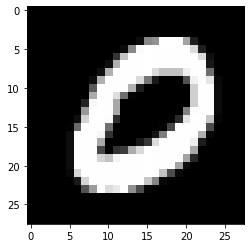

In [458]:
def rrrr(index):
    print('预测序号：{}'.format(index))
    print('我的预测：{}'.format(predict(train_image[index],parameters).argmax()))
    show_train(index)
rrrr(random.randint(0,50000))

In [470]:
def train_verify(parameters):
    error_num=0
    for i in range(train_num):
        
        if predict(train_image[i],parameters).argmax()!=train_label[i]:
        
            error_num+=1
            
    rate=1-error_num/train_num
    print('准确率：'+str(rate*100)+'%')

    

train_verify(parameters)
    

准确率：80.28%
